In [1]:
# 로이터 데이터셋 로드
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/mingggkeee/miniforge3/envs/mingggkeee/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/mingggkeee/miniforge3/envs/mingggkeee/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print(len(train_data), len(test_data))

8982 2246


In [3]:
# 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
# 데이터 인코딩
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimemsion=46):
    results = np.zeros((len(labels), dimemsion))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [5]:
# 모델 정의
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
# compile
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# 검증세트 준비
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
# train
history = model.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 3.1448 - accuracy: 0.4186 - val_loss: 1.7246 - val_accuracy: 0.6530
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4813 - accuracy: 0.6978 - val_loss: 1.3185 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0827 - accuracy: 0.7687 - val_loss: 1.1499 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8465 - accuracy: 0.8175 - val_loss: 1.0493 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6803 - accuracy: 0.8611 - val_loss: 0.9890 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5229 - accuracy: 0.8901 - val_loss: 0.9364 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4364 - accuracy: 0.9118 - val_loss: 0.9246 - val_accuracy: 0.8070
Epoch 8/20
16

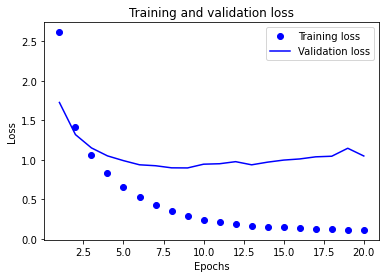

In [9]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

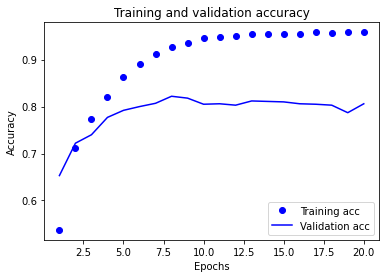

In [15]:
# 훈련과 검증 정확도 그리기
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
# 모델을 처음부터 다시 훈련
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_X_train, partial_y_train, epochs=9, batch_size=512, validation_data=(X_val, y_val))
results = model.evaluate(X_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 3.0692 - accuracy: 0.4150 - val_loss: 1.7018 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4775 - accuracy: 0.7020 - val_loss: 1.2851 - val_accuracy: 0.7280
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.0754 - accuracy: 0.7792 - val_loss: 1.1197 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8532 - accuracy: 0.8196 - val_loss: 1.0168 - val_accuracy: 0.7900
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6716 - accuracy: 0.8574 - val_loss: 0.9585 - val_accuracy: 0.7890
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.5366 - accuracy: 0.8869 - val_loss: 0.9247 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4507 - accuracy: 0.9057 - val_loss: 0.8998 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [17]:
results

[0.9938876628875732, 0.7858415246009827]

In [18]:
# 새로운 데이터에 대해 예측
predictions = model.predict(X_test)